# MLP - Multilayered Perceptron

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentations
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [4]:
x_train.shape

(60000, 28, 28)

7

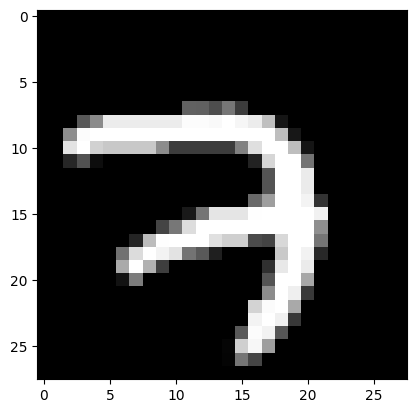

In [10]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [11]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
x_train[5000].shape


(28, 28)

In [13]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [14]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

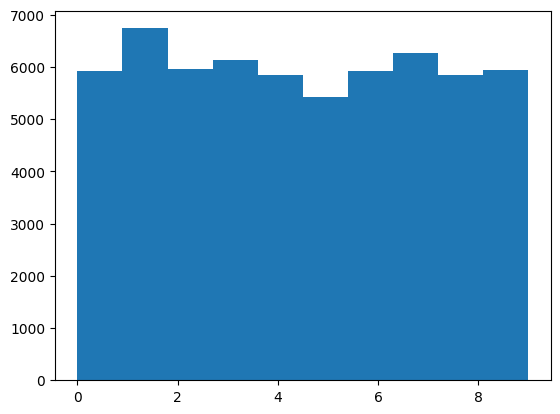

In [17]:
plt.hist(y_train)

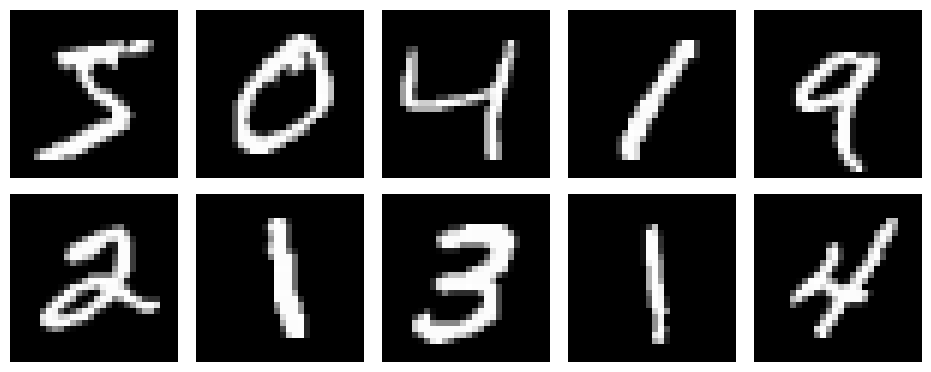

In [18]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

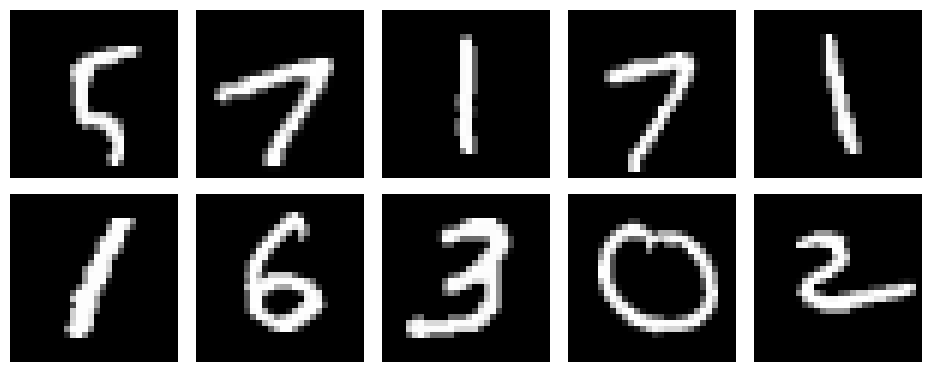

In [19]:
display_images(x_train[100:110])
x_train[100:110].shape

## Normalize Data

In [20]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [21]:
X_train[5000].reshape(-1).shape

(784,)

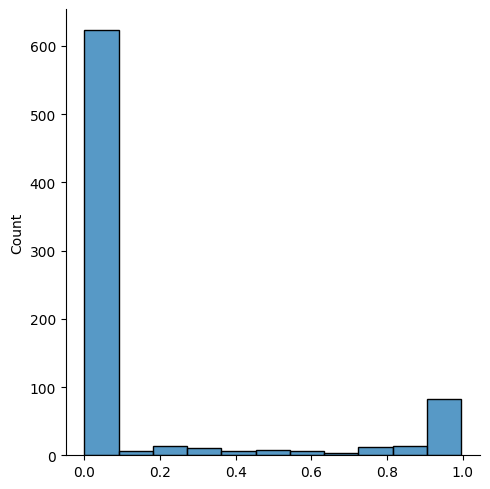

In [22]:

import seaborn as sns 

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

## MLP Model

- 10 output neurons/nodes (which represents 0,1,2,3,...,9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers -> Dense

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

c:\Users\arthu\OneDrive\Documentos\VS\OPA - Semester 2\Python\AI2-Arthur-Lopez-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_naive.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7930 - loss: 0.7829 - val_accuracy: 0.9157 - val_loss: 0.3095
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9098 - loss: 0.3266 - val_accuracy: 0.9222 - val_loss: 0.2792
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9158 - loss: 0.3014 - val_accuracy: 0.9273 - val_loss: 0.2674
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9191 - loss: 0.2910 - val_accuracy: 0.9299 - val_loss: 0.2618
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9235 - loss: 0.2760 - val_accuracy: 0.9292 - val_loss: 0.2593
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9246 - loss: 0.2667 - val_accuracy: 0.9299 - val_loss: 0.2561
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2604 - val_accuracy: 0.9281 - val_loss: 0.2630
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9261 - loss: 0.2655 - 

In [25]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86810,0.505335,0.9157,0.309520
1,0.91222,0.316624,0.9222,0.279198
2,0.91828,0.293230,0.9273,0.267388
3,0.92118,0.281211,0.9299,0.261821
4,0.92282,0.274212,0.9292,0.259272


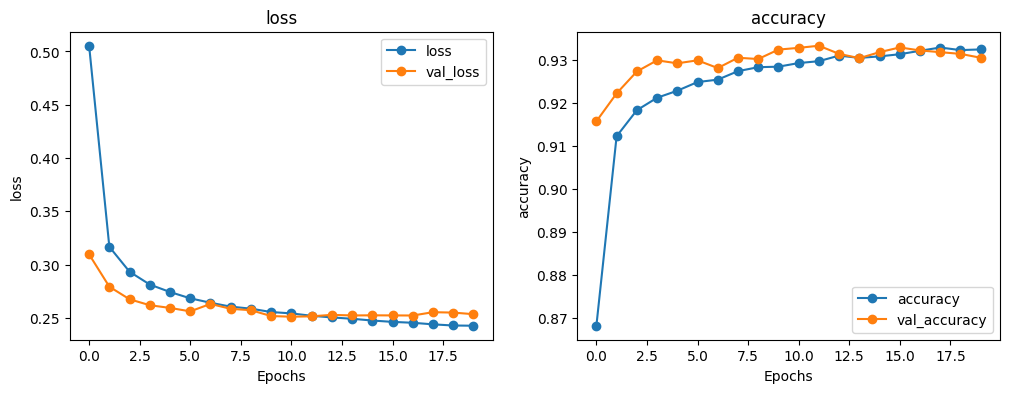

In [26]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )


plot_metrics(naive_history)

## Add hidden layers


In [27]:
model_deep = mlp_model(
    neurons=[128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1", "Hidden_2", "Output"],
)

model_deep.summary()

c:\Users\arthu\OneDrive\Documentos\VS\OPA - Semester 2\Python\AI2-Arthur-Lopez-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_deep.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8687 - loss: 0.4525 - val_accuracy: 0.9614 - val_loss: 0.1291
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9657 - loss: 0.1108 - val_accuracy: 0.9669 - val_loss: 0.1056
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0747 - val_accuracy: 0.9696 - val_loss: 0.0974
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9825 - loss: 0.0554 - val_accuracy: 0.9764 - val_loss: 0.0778
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9776 - val_loss: 0.0806
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9784 - val_loss: 0.0798
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9920 - loss: 0.0259 - val_accuracy: 0.9761 - val_loss: 0.0946
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0190 - 

In [29]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92418,0.256690,0.9614,0.129070
1,0.96808,0.104838,0.9669,0.105649
2,0.97620,0.076119,0.9696,0.097448
3,0.98216,0.055636,0.9764,0.077754
4,0.98656,0.040951,0.9776,0.080610


In [ ]:
git push --force